In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# 2. Load Dataset
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

In [3]:
# 3. Check for missing values
print(df.isnull().sum().sum())  # Should be 0

0


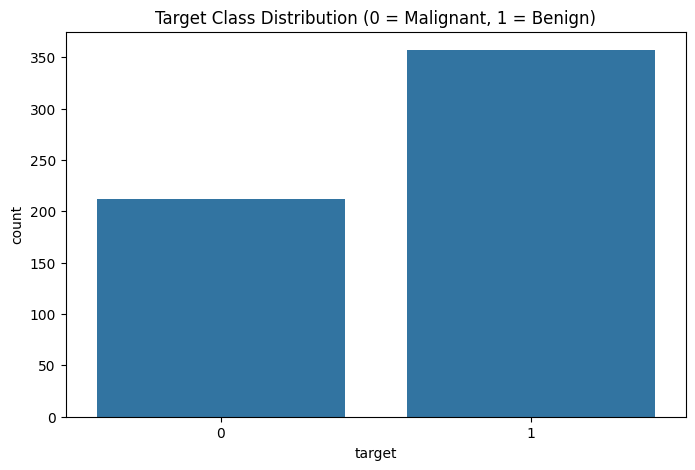

In [4]:
# 4. Exploratory Data Analysis
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=df)
plt.title('Target Class Distribution (0 = Malignant, 1 = Benign)')
plt.show()

In [5]:
# 5. Feature Scaling
X = df.drop('target', axis=1)
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# 6. Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
# 7. Train the SVM Model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [8]:
# 8. Make Predictions
y_pred = svm_model.predict(X_test)

In [9]:
# 9. Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
 [[41  2]
 [ 3 68]]


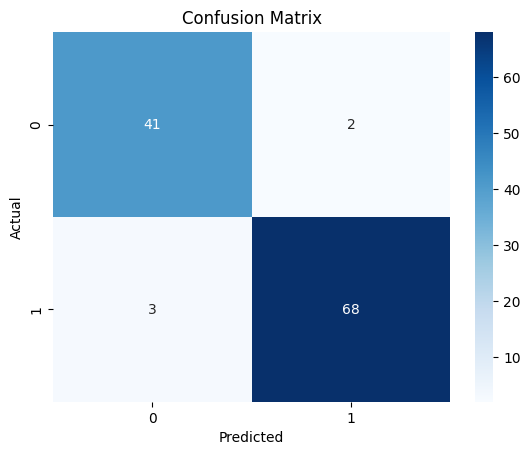

In [10]:
# 10. Visualize Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Try Different Algorithm — Random Forest**

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate
y_pred_rf = rf_model.predict(X_test)

print("📊 Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

📊 Random Forest Classifier:
Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



**Hyperparameter Tuning — SVM with GridSearchCV**

In [12]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Perform grid search
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0, cv=5)
grid.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid.best_params_)

# Evaluate tuned model
y_pred_grid = grid.predict(X_test)
print("📊 Tuned SVM (GridSearchCV):")
print("Accuracy:", accuracy_score(y_test, y_pred_grid))
print("\nClassification Report:\n", classification_report(y_test, y_pred_grid))


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
📊 Tuned SVM (GridSearchCV):
Accuracy: 0.9824561403508771

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



**Feature Selection — Top 10 Features with Highest Importance (from Random Forest)**

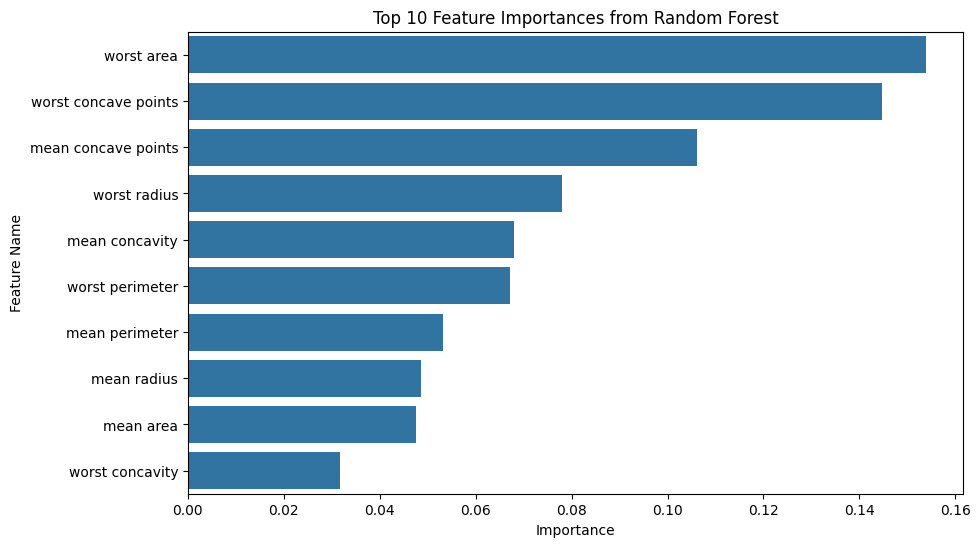

📊 SVM on Top 10 Features:
Accuracy: 0.9824561403508771

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [13]:
# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot top 10 features
top_n = 10
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:top_n], y=np.array(cancer.feature_names)[indices][:top_n])
plt.title("Top 10 Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature Name")
plt.show()

# Select top 10 features
top_features = np.array(cancer.feature_names)[indices][:top_n]
X_top = df[top_features]
X_top_scaled = scaler.fit_transform(X_top)

# Train/test split
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top_scaled, y, test_size=0.2, random_state=42)

# Retrain SVM on top features
svm_top = SVC(kernel='linear')
svm_top.fit(X_train_top, y_train_top)
y_pred_top = svm_top.predict(X_test_top)

print("📊 SVM on Top 10 Features:")
print("Accuracy:", accuracy_score(y_test_top, y_pred_top))
print("\nClassification Report:\n", classification_report(y_test_top, y_pred_top))


In [14]:
import joblib
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [15]:
from google.colab import files

files.download('svm_model.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>